### EDA

#### Purpose of the Notebook:
- To explore the cleaned dataset for insights that could enhance the semantic search functionality.
- To visualize data distributions and relationships that can inform feature selection and model tuning.

#### Goal:
- Understand data distribution and quality.
- Identify patterns or trends in product attributes that might influence search relevance.
- Assess how different attributes correlate with each other, potentially guiding the semantic search algorithm.

#### Insights Looking For:
- Distribution of prices, ratings, and colors.
- Relationship between product descriptions and categories to ensure semantic relevance.
- Size availability patterns which might affect user queries.


In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

In [21]:
# Download necessary NLTK data
nltk.download('stopwords')

# Load the cleaned dataset
df = pd.read_csv('../data/semantic_search_ready_data.csv')

# Basic dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            112 non-null    object 
 1   sub_title       112 non-null    object 
 2   color           112 non-null    object 
 3   price           112 non-null    float64
 4   description     112 non-null    object 
 5   avg_rating      112 non-null    float64
 6   review_count    112 non-null    float64
 7   parsed_sizes    112 non-null    object 
 8   dominant_color  112 non-null    object 
dtypes: float64(3), object(6)
memory usage: 8.0+ KB
None


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


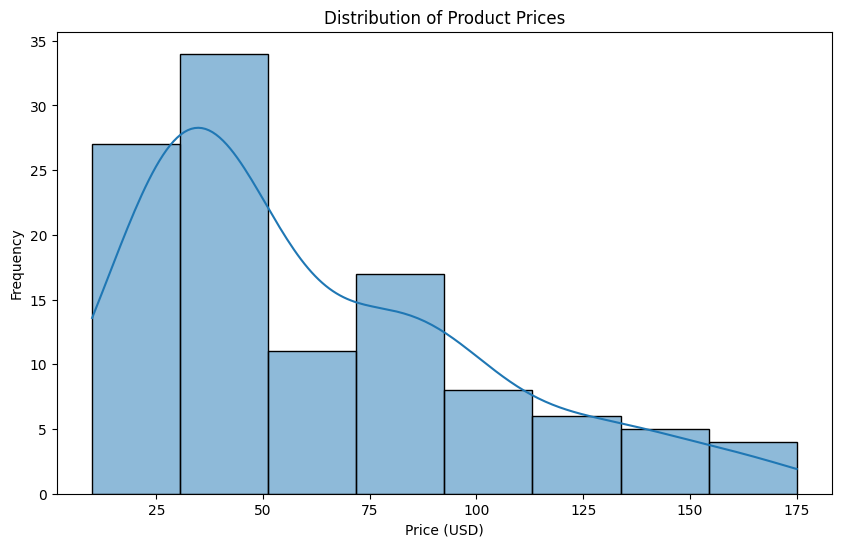

In [22]:
# Distribution of price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

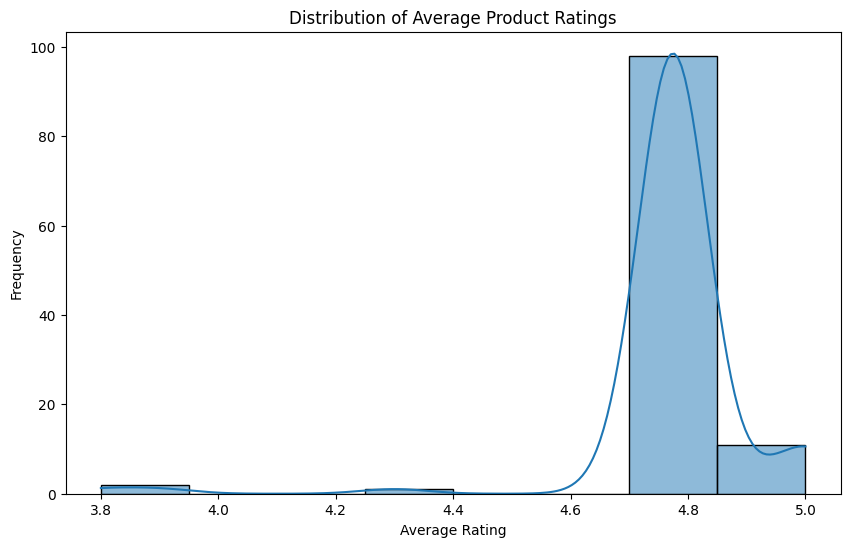

In [23]:
# Distribution of average ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_rating'], kde=True)
plt.title('Distribution of Average Product Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

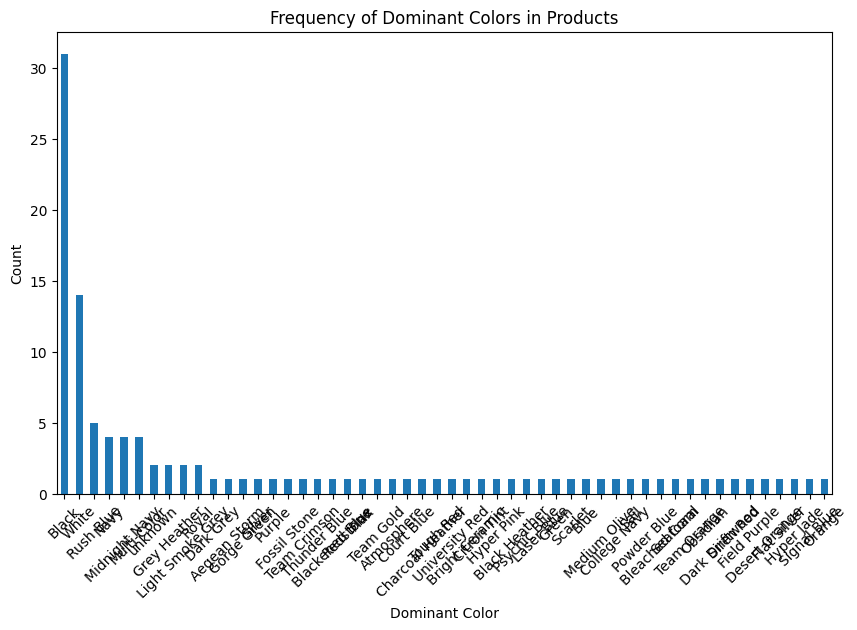

In [24]:
# Color analysis
color_counts = df['dominant_color'].value_counts()
plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar')
plt.title('Frequency of Dominant Colors in Products')
plt.xlabel('Dominant Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

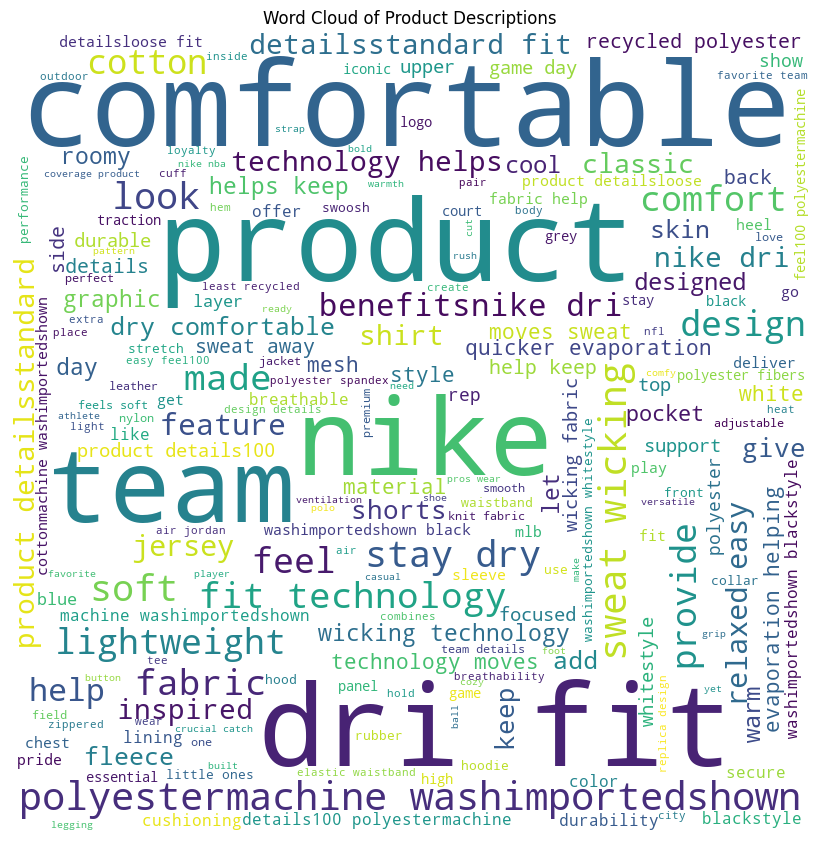

In [25]:
# Word Cloud from descriptions for a visual of common words
stop_words = set(stopwords.words('english'))

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(' '.join(df['description'].astype(str)))

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Word Cloud of Product Descriptions')
plt.show()

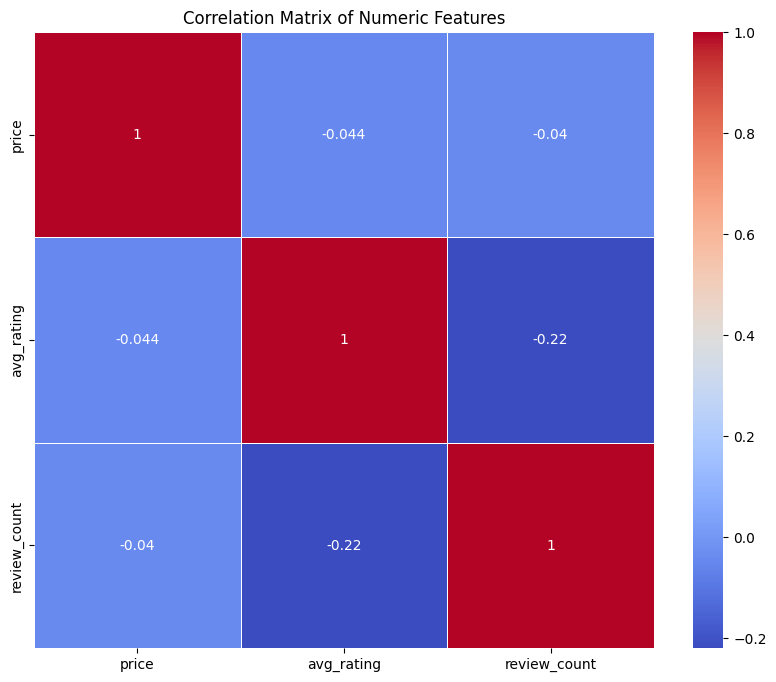

In [26]:
# correlation between numeric variables
import numpy as np
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

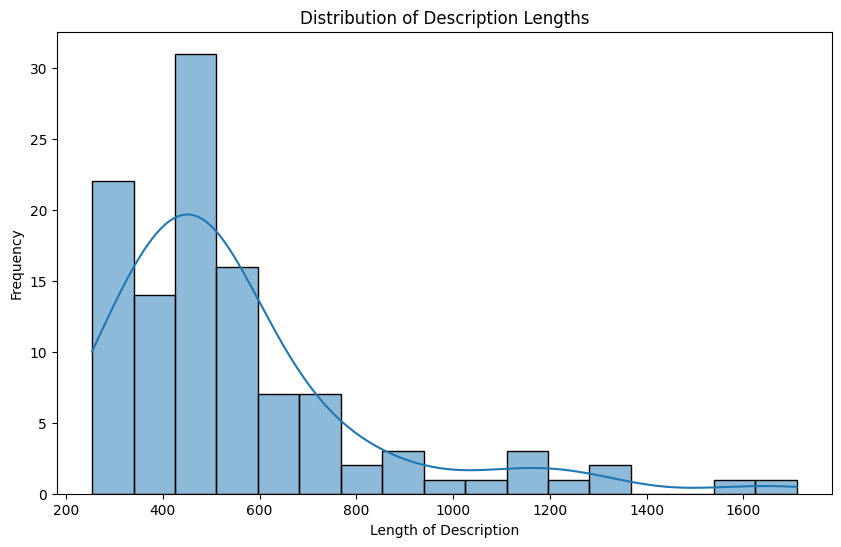

In [27]:
# Description length analysis
df['description_length'] = df['description'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['description_length'], kde=True)
plt.title('Distribution of Description Lengths')
plt.xlabel('Length of Description')
plt.ylabel('Frequency')
plt.show()

### Insights from Exploratory Data Analysis

- **Distribution of Product Prices**: The histogram shows that the majority of Nike products in the dataset are priced between $25 and $50, with a peak around $40. This suggests that lower to mid-range priced items are more common, which could be useful for setting price filters in the semantic search tool to cater to the most frequent price range.

- **Distribution of Average Product Ratings**: Most products have an average rating clustered around 4.6 to 4.8, indicating a high level of customer satisfaction. This information could be leveraged to prioritize products with higher ratings in search results, enhancing user trust in the recommendations.

- **Frequency of Dominant Colors**: The bar chart reveals that 'Black' is the most dominant color in the product lineup, followed by 'White' and 'Rush Pink'. This insight can help in optimizing search algorithms to prioritize color preferences, especially for users who might search for products by color.

- **Correlation Matrix of Numeric Features**:
  - There is a very weak negative correlation between `price` and `avg_rating` (-0.044), suggesting that price does not significantly influence customer ratings.
  - A slightly negative correlation exists between `avg_rating` and `review_count` (-0.22), indicating that products with more reviews might not necessarily have higher ratings, which could inform how we weight review counts in search relevance.
  - The correlation between `price` and `review_count` is negligible (-0.04), implying that product price doesn't affect the number of reviews it receives.
